In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
dfs = pd.read_html('https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html')
df = pd.concat(dfs)

In [3]:
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0))
df = df.rename(columns={'Год': 'Year', 'Количество родившихся чел.': 'People'})
df.head()

,Year,People
1,1959,2 796 228
2,1960,2 782 353
3,1961,2 662 135
4,1962,2 482 539
5,1963,2 331 505


In [4]:
df.dtypes

0
Year      object
People    object
dtype: object

In [5]:
def foo(col):
    return col.replace(' ', '')

In [6]:
df.Year = df.Year.astype(int)
df.People = df.People.apply(foo).astype(int)

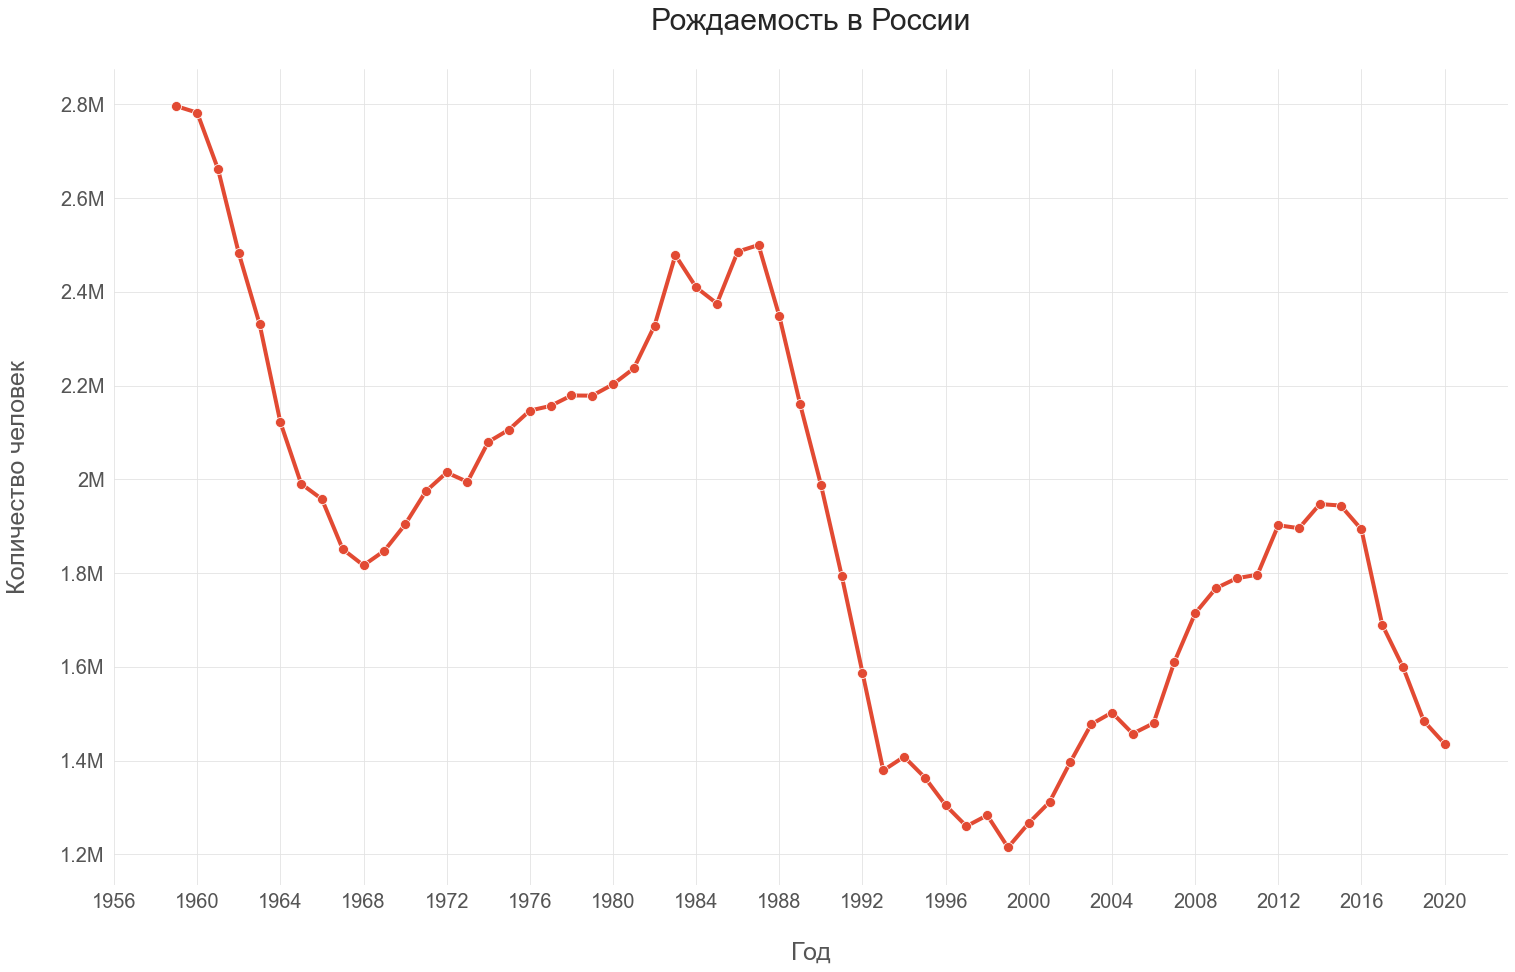

In [8]:
plt.style.use('ggplot')                       # Красивые графики
plt.rcParams['figure.figsize'] = (25, 15)
ax = sns.lineplot(x='Year', y='People', data=df, marker='o', linewidth=4)
plt.title('Рождаемость в России', fontsize=30, pad=40)
plt.xlabel('Год', fontsize=25, labelpad=30)
plt.ylabel('Количество человек', fontsize=25, labelpad=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.set_style("whitegrid")
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.set_facecolor('white')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: '{:,g}M'.format(y/1000000)))
ax.grid(True, color='#e2e2e2', alpha=1)
sns.despine()